### Transformation of Features

Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling)
1.ANN--->GLobal Minima, Gradient
2.CNN
3.RNN

0-255 pixels

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

##### Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

Survived  Pclass   Age     Fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833
2         1       3  26.0   7.9250
3         1       1  35.0  53.1000
4         0       3  35.0   8.0500

In [92]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [93]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [94]:
### Independent and dependent features
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [95]:
X

Pclass   Age     Fare
0         3  22.0   7.2500
1         1  38.0  71.2833
2         3  26.0   7.9250
3         1  35.0  53.1000
4         3  35.0   8.0500
..      ...   ...      ...
886       2  27.0  13.0000
887       1  19.0  30.0000
888       3  28.0  23.4500
889       1  26.0  30.0000
890       3  32.0   7.7500

[891 rows x 3 columns]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
X_train

Pclass   Age      Fare
6         1  54.0   51.8625
718       3  28.0   15.5000
685       2  25.0   41.5792
73        3  26.0   14.4542
882       3  22.0   10.5167
..      ...   ...       ...
106       3  21.0    7.6500
270       1  28.0   31.0000
860       3  41.0   14.1083
435       1  14.0  120.0000
102       1  21.0   77.2875

[596 rows x 3 columns]

In [98]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [99]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [100]:
pd.DataFrame(X_train_scaled).describe()

0             1             2
count  5.960000e+02  5.960000e+02  5.960000e+02
mean  -8.941393e-18  2.682418e-16  5.364836e-17
std    1.000840e+00  1.000840e+00  1.000840e+00
min   -1.625803e+00 -2.224559e+00 -6.204156e-01
25%   -4.100205e-01 -5.579078e-01 -4.663459e-01
50%    8.057618e-01 -9.452019e-02 -3.394119e-01
75%    8.057618e-01  4.460987e-01 -1.239918e-02
max    8.057618e-01  3.921506e+00  9.339763e+00

In [101]:
X_test_scaled=scaler.transform(X_test)

In [102]:
pd.DataFrame(X_test_scaled).describe()

0           1           2
count  295.000000  295.000000  295.000000
mean    -0.105045    0.032126    0.017112
std      1.045560    1.016301    0.893292
min     -1.625803   -2.192894   -0.620416
25%     -1.625803   -0.557908   -0.466914
50%      0.805762   -0.094520   -0.339412
75%      0.805762    0.523330   -0.020702
max      0.805762    3.226425    4.480410

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Min Max Scaling  (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
X_train

Pclass   Age      Fare
6         1  54.0   51.8625
718       3  28.0   15.5000
685       2  25.0   41.5792
73        3  26.0   14.4542
882       3  22.0   10.5167
..      ...   ...       ...
106       3  21.0    7.6500
270       1  28.0   31.0000
860       3  41.0   14.1083
435       1  14.0  120.0000
102       1  21.0   77.2875

[596 rows x 3 columns]

In [104]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

0         1         2
0  0.0  0.673285  0.101229
1  1.0  0.346569  0.030254
2  0.5  0.308872  0.081157
3  1.0  0.321438  0.028213
4  1.0  0.271174  0.020527

##### Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

0         1         2
0 -2.0  2.000000  1.602069
1  0.0  0.000000  0.044788
2 -1.0 -0.230769  1.161670
3  0.0 -0.153846  0.000000
4  0.0 -0.461538 -0.168630

In [108]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [110]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [111]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [24]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [112]:
import matplotlib.pyplot as plt

In [113]:
import scipy.stats as stat
import pylab 

In [114]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

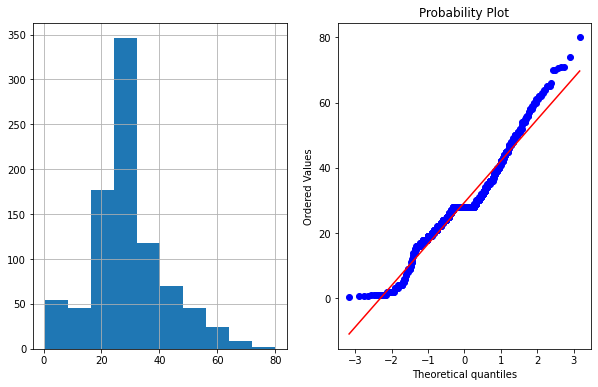

In [115]:
plot_data(df,'Age')

#### Logarithmic Transformation

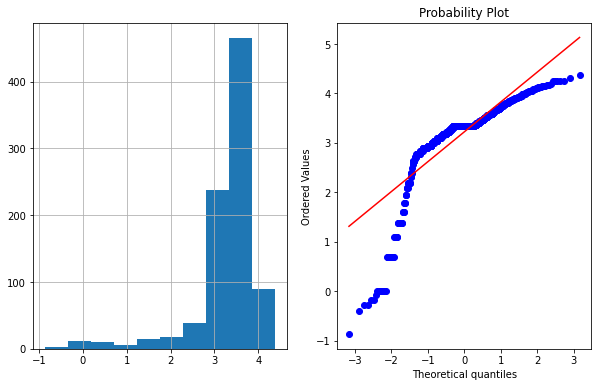

In [116]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

#### Reciprocal Trnasformation

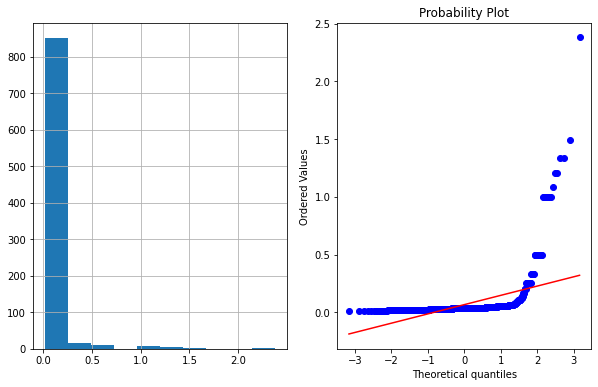

In [117]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

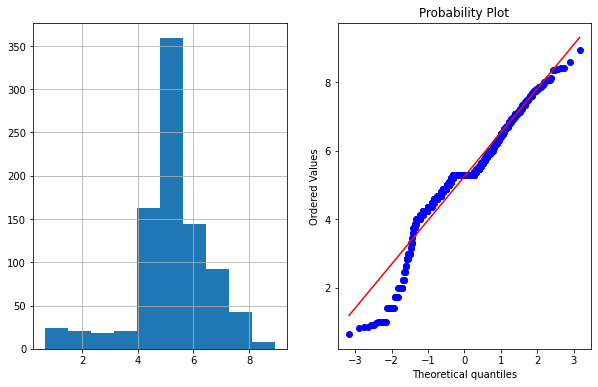

In [34]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

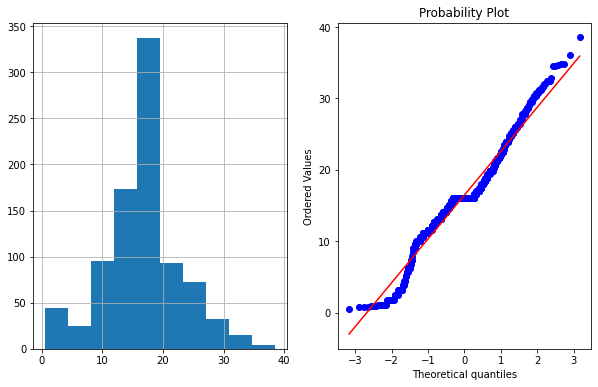

In [118]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [119]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [120]:
print(parameters)

0.7964531473656952


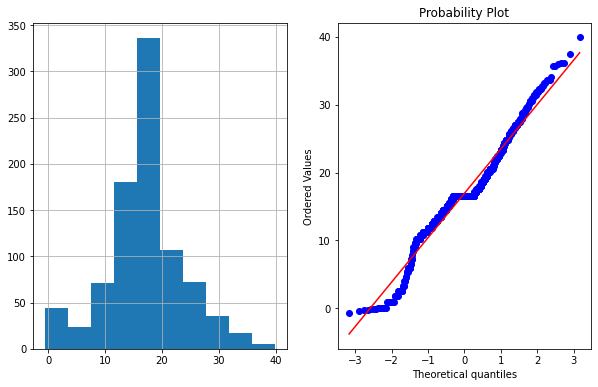

In [121]:
plot_data(df,'Age_Boxcox')

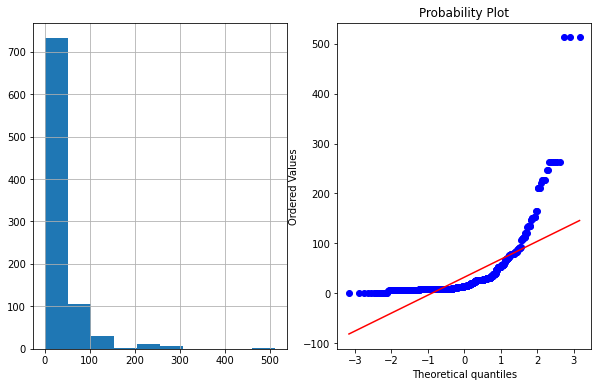

In [122]:
plot_data(df,'Fare')

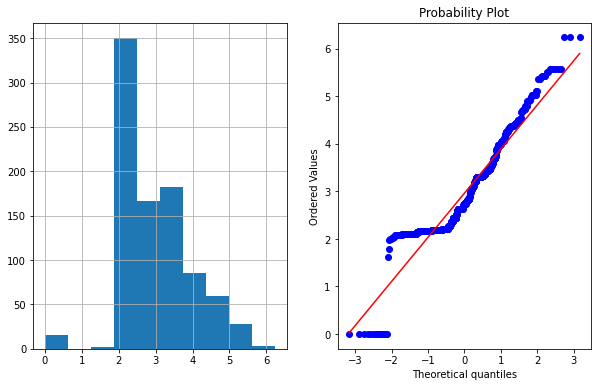

In [123]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

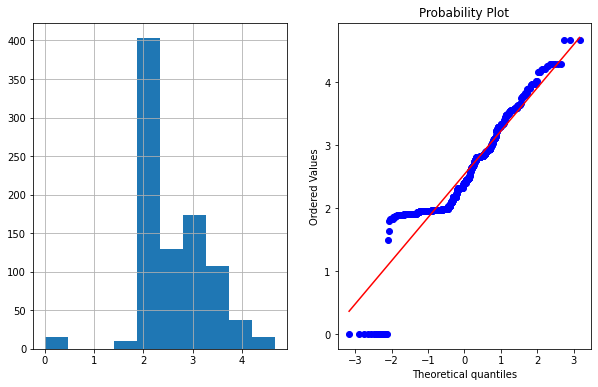

In [124]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')